In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /home/mabitbol/GBT-S140/analysis/

/home/mabitbol/GBT-S140/analysis


In [3]:
import foregrounds as fg
from scipy.optimize import curve_fit
import emcee
import corner

In [4]:
fdg = np.loadtxt('/home/mabitbol/GBT-S140/externaldata/fd_G107_wim.dat')

In [5]:
cfs = fdg[:, 0] * 1.e9
cjys = fdg[:, 1]
cerrs = fdg[:, 2]
cfit = fdg[:, 3]
crem = fdg[:, 4]
cremerr = fdg[:, 5]

In [6]:
freqs = np.logspace(8, 13, 2000)
nu = freqs*1.e-9

In [7]:
beam = pi*(1.*pi/180.)**2
beam2 = pi*((0.16/60.)*pi/180.)**2

In [8]:
nfreqs = np.array([4.575, 5.625, 6.125]) * 1.e9
newdata = np.array([ 34.6409529, 35.52669743, 37.08009918])

In [9]:
bigfs = np.concatenate([cfs, nfreqs])
bigdata = np.concatenate([cjys, newdata])
bigerrs = np.concatenate([cerrs, newdata * 0.2])

In [10]:
def signal(freqs, EM, Asd, nup, Ad, Bd, Acmb):
    fffit = fg.freefreep(freqs, EM=EM, Te=8000.)
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=18.96)
    amefit = fg.ame(freqs, Asd=Asd, nup=nup, nu0=22.8e9) 
    ccmb = fg.cmb(freqs, A=Acmb)
    return (fffit + dustfit + amefit + ccmb) * beam

In [66]:
def signal(freqs, EM, Asd, nup, Ad, Bd):
    fffit = fg.freefreep(freqs, EM=EM, Te=8000.)
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=18.96)
    amefit = fg.ame(freqs, Asd=Asd, nup=nup, nu0=22.8e9) 
    return (fffit + dustfit + amefit) * beam

In [11]:
def signal2(freqs, EM1, EM2, Ad, Bd):
    fffit = fg.freefreep(freqs, EM=EM1, Te=8000.) * beam
    fffit2 = fg.freefreep(freqs, EM=EM2, Te=8000.) * beam2
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=18.96) * beam
    return fffit + fffit2 + dustfit

In [68]:
#pn = np.array([200., 1.e-3, 20.e9, 80.e-5, 2., 30.e-6])
pn = np.array([200., 1.e-3, 20.e9, 80.e-5, 2.])
x = curve_fit(signal, cfs, cjys, p0=pn, sigma=cerrs, absolute_sigma=True)
pfit = x[0]

In [69]:
pn2 = np.array([145. , 1.e7, 50.e-5, 2.])
y = curve_fit(signal2, cfs, cjys, p0=pn2, sigma=cerrs, absolute_sigma=True)
pfit2 = y[0]

In [14]:
pn = np.array([200., 1.e-3, 20.e9, 80.e-5, 2., 30.e-6])
x = curve_fit(signal, bigfs, bigdata, p0=pn, sigma=bigerrs, absolute_sigma=True)
pfit3 = x[0]

In [70]:
pn = np.array([200., 1.e-3, 20.e9, 80.e-5, 2.])
x = curve_fit(signal, bigfs, bigdata, p0=pn, sigma=bigerrs, absolute_sigma=True)
pfit3 = x[0]

In [71]:
pn2 = np.array([145. , 1.e7, 50.e-5, 2.])
y = curve_fit(signal2, bigfs, bigdata, p0=pn2, sigma=bigerrs, absolute_sigma=True)
pfit4 = y[0]

In [16]:
rchisq1 = np.sum( ( cjys - signal(cfs, *pfit))**2 / cerrs**2 ) / (len(cjys) - 6.)
rchisq3 = np.sum( ( bigdata - signal(bigfs, *pfit3))**2 / bigerrs**2 ) / (len(bigdata) - 6.)

In [17]:
rchisq2 = np.sum( ( cjys - signal2(cfs, *pfit2))**2 / cerrs**2 ) / (len(cjys) - 4.)
rchisq4 = np.sum( ( bigdata - signal2(bigfs, *pfit4))**2 / bigerrs**2 ) / (len(bigdata) - 4.)

In [18]:
print rchisq1, rchisq3

2.18054609027 2.29637464516


In [19]:
print rchisq2, rchisq4

1.94780220441 1.65687962425


In [72]:
rchisq1 = np.sum( ( cjys - signal(cfs, *pfit))**2 / cerrs**2 ) / (len(cjys) - 5.)
rchisq3 = np.sum( ( bigdata - signal(bigfs, *pfit3))**2 / bigerrs**2 ) / (len(bigdata) - 5.)

In [73]:
rchisq2 = np.sum( ( cjys - signal2(cfs, *pfit2))**2 / cerrs**2 ) / (len(cjys) - 4.)
rchisq4 = np.sum( ( bigdata - signal2(bigfs, *pfit4))**2 / bigerrs**2 ) / (len(bigdata) - 4.)

In [74]:
print rchisq1, rchisq3

2.32417583189 2.25772946764


In [75]:
print rchisq2, rchisq4

1.94780220441 1.65687962425


In [20]:
print "EM, Asd, nup, Ad, Bd, Acmb"
print pfit
print pfit3

EM, Asd, nup, Ad, Bd, Acmb
[  1.93890052e+02   1.19212901e-03   3.00679026e+10   6.87690050e-04
   2.12703678e+00   1.00451916e-04]
[  3.16889375e+02   7.86304927e-04   2.91948280e+10   7.06602740e-04
   2.10672115e+00   5.50446072e-05]


In [21]:
print "EM1, EM2, Ad, Bd"
print pfit2
print pfit4

EM1, EM2, Ad, Bd
[  1.71705308e+02   4.55481931e+07   7.14991021e-04   2.09825458e+00]
[  1.71258095e+02   4.54586693e+07   7.13563313e-04   2.09982349e+00]


In [76]:
print "EM, Asd, nup, Ad, Bd"
print pfit
print pfit3

EM, Asd, nup, Ad, Bd
[  2.44430082e+02   9.66027890e-04   3.35282248e+10   8.23372461e-04
   1.98368693e+00]
[  3.31269863e+02   7.05109265e-04   3.20496430e+10   7.86470911e-04
   2.02209514e+00]


In [77]:
print "EM1, EM2, Ad, Bd"
print pfit2
print pfit4

EM1, EM2, Ad, Bd
[  1.71705308e+02   4.55481931e+07   7.14991021e-04   2.09825458e+00]
[  1.71258095e+02   4.54586693e+07   7.13563313e-04   2.09982349e+00]


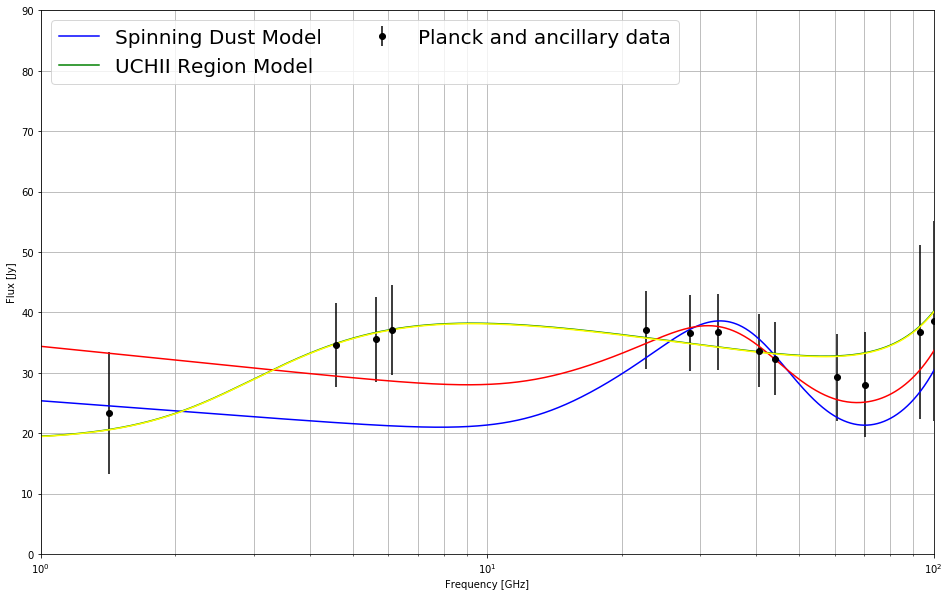

In [78]:
figure(figsize=(16,10))
plot(nu, signal(freqs, *pfit), 'b', label='Spinning Dust Model')
plot(nu, signal2(freqs, *pfit2), 'g', label='UCHII Region Model')
plot(nu, signal(freqs, *pfit3), 'r')
plot(nu, signal2(freqs, *pfit4), 'yellow')
errorbar(bigfs*1.e-9, bigdata, yerr=bigerrs, fmt='ko', label='Planck and ancillary data')

xscale('log')
ylim([0, 90])
xlim([1, 100])
#yscale('log')
xlabel('Frequency [GHz]')
ylabel('Flux [Jy]')
legend(loc=2, ncol=2, fontsize=20)
grid()
grid(which='minor')

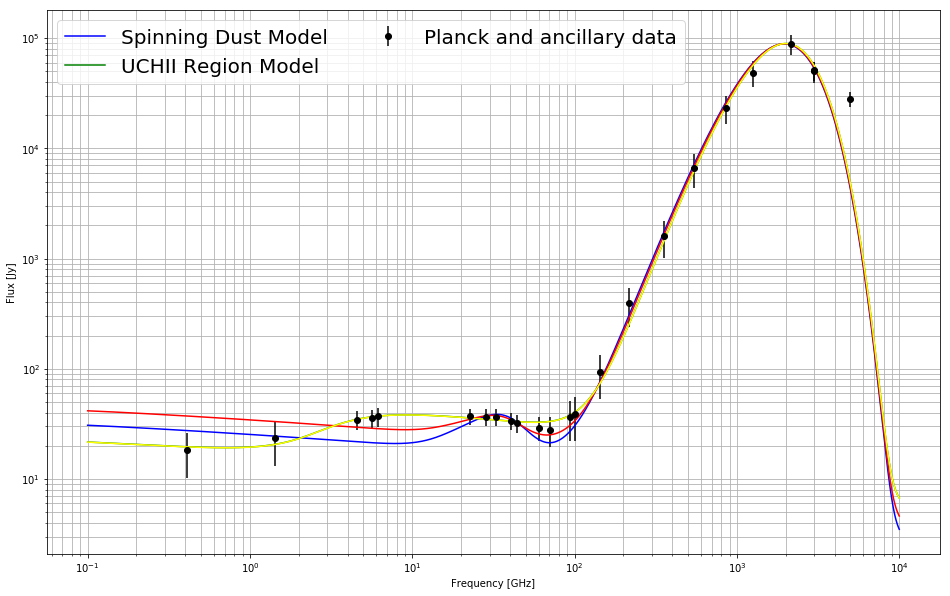

In [79]:
figure(figsize=(16,10))
plot(nu, signal(freqs, *pfit), 'b', label='Spinning Dust Model')
plot(nu, signal2(freqs, *pfit2), 'g', label='UCHII Region Model')
plot(nu, signal(freqs, *pfit3), 'r')
plot(nu, signal2(freqs, *pfit4), 'yellow')
errorbar(bigfs*1.e-9, bigdata, yerr=bigerrs, fmt='ko', label='Planck and ancillary data')

xscale('log')
#ylim([0, 90])
#xlim([1, 100])
yscale('log')
xlabel('Frequency [GHz]')
ylabel('Flux [Jy]')
legend(loc=2, ncol=2, fontsize=20)
grid()
grid(which='minor')

In [80]:
def lnprior2(theta):
    return 0.

In [81]:
def lnprob2(theta, x, y, yerr):
    lp = lnprior2(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike2(theta, x, y, yerr)

In [82]:
def lnlike2(theta, x, y, yerr):
    EM1, EM2, Ad, Bd = theta
    fffit = fg.freefreep(x, EM=EM1, Te=8000.) * beam
    fffit2 = fg.freefreep(x, EM=EM2, Te=8000.) * beam2
    dustfit = fg.thermal_dust(x, Ad=Ad, Bd=Bd, Td=18.96) * beam
    model = fffit + fffit2 + dustfit
    return -0.5 * (np.sum((y-model)**2. * yerr**-2.))

In [83]:
ndim, nwalkers = 4, 64
pos = [pfit4 * (1. + 1.e-3*np.random.randn(ndim)) for i in range(nwalkers)]

In [84]:
sampler1 = emcee.EnsembleSampler(nwalkers, ndim, lnprob2, args=(bigfs, bigdata, bigerrs), threads=16)

In [85]:
sampler1.run_mcmc(pos, 1024);

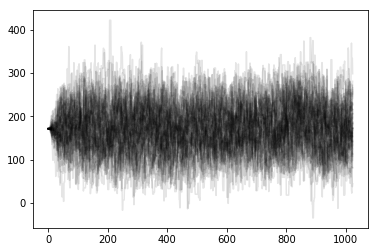

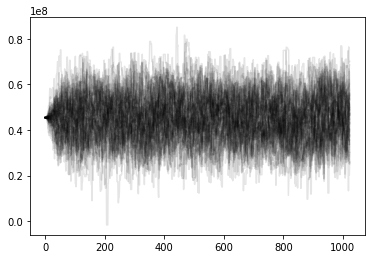

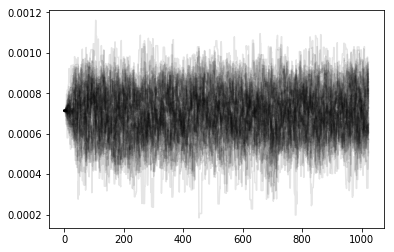

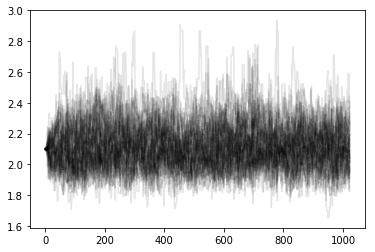

In [86]:
for k in range(ndim):
    figure()
    plot(sampler1.chain[:,:,k].T, color='k', alpha=0.1);

In [87]:
samples1 = sampler1.chain[:, 200:, :].reshape((-1, ndim))

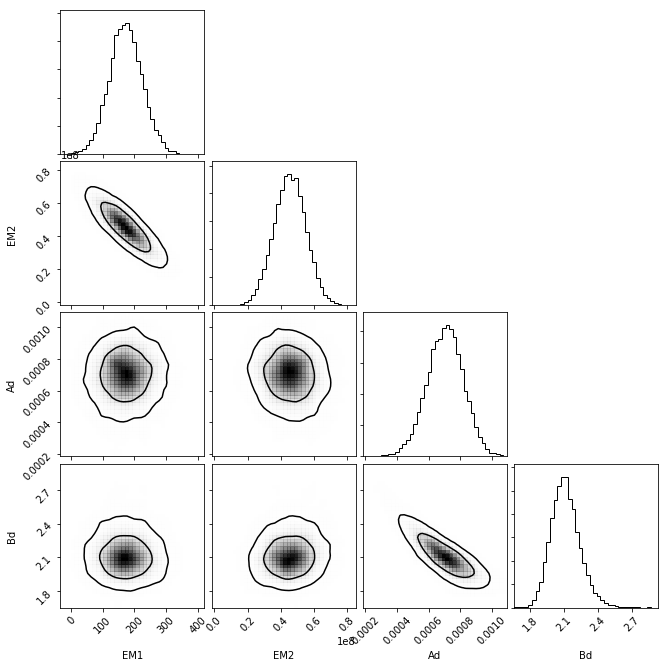

In [88]:
fig = corner.corner(samples1, plot_datapoints=False, bins=40, levels=[0.68,0.95], smooth=1.,\
                    labels=["EM1", "EM2", "Ad", "Bd"])

In [33]:
def lnprior(theta):
    EM, Asd, nup, Ad, Bd, Acmb = theta
    if Asd < 0 or nup < 0 or Ad < 0 or Bd < 0:
        return np.inf
    return 0.

In [89]:
def lnprior(theta):
    EM, Asd, nup, Ad, Bd = theta
    if Asd < 0 or nup < 0 or Ad < 0 or Bd < 0:
        return np.inf
    return 0.

In [90]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [35]:
def lnlike(theta, x, y, yerr):
    EM, Asd, nup, Ad, Bd, Acmb = theta
    fffit = fg.freefreep(x, EM=EM, Te=8000.)
    dustfit = fg.thermal_dust(x, Ad=Ad, Bd=Bd, Td=18.96)
    amefit = fg.ame(x, Asd=Asd, nup=nup, nu0=22.8e9) 
    ccmb = fg.cmb(x, A=Acmb)
    model = (fffit + dustfit + amefit + ccmb) * beam
    return -0.5 * (np.sum((y - model)**2. * yerr**-2.))

In [91]:
def lnlike(theta, x, y, yerr):
    EM, Asd, nup, Ad, Bd = theta
    fffit = fg.freefreep(x, EM=EM, Te=8000.)
    dustfit = fg.thermal_dust(x, Ad=Ad, Bd=Bd, Td=18.96)
    amefit = fg.ame(x, Asd=Asd, nup=nup, nu0=22.8e9) 
    model = (fffit + dustfit + amefit) * beam
    return -0.5 * (np.sum((y - model)**2. * yerr**-2.))

In [92]:
ndim, nwalkers = 5, 64
pos = [pfit3 * (1. + 1.e-3*np.random.randn(ndim)) for i in range(nwalkers)]

In [93]:
sampler2 = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(bigfs, bigdata, bigerrs), threads=32)

In [ ]:
sampler2.run_mcmc(pos, 1024);

In [ ]:
for k in range(ndim):
    figure()
    plot(sampler2.chain[:,:,k].T, color='k', alpha=0.1);

In [40]:
samples2 = sampler2.chain[:, 200:, :].reshape((-1, ndim))

In [59]:
np.where(sampler2.lnprobability[:, 200:].reshape((-1, len(samples2))) == sampler2.lnprobability[:, 200:].reshape((-1, len(samples2))).max())

(array([0]), array([42338]))

In [60]:
samples2[42338]

array([  3.18976276e+02,   8.09714574e-04,   2.89430029e+10,
         7.10322663e-04,   2.08902632e+00,   5.55941389e-05])

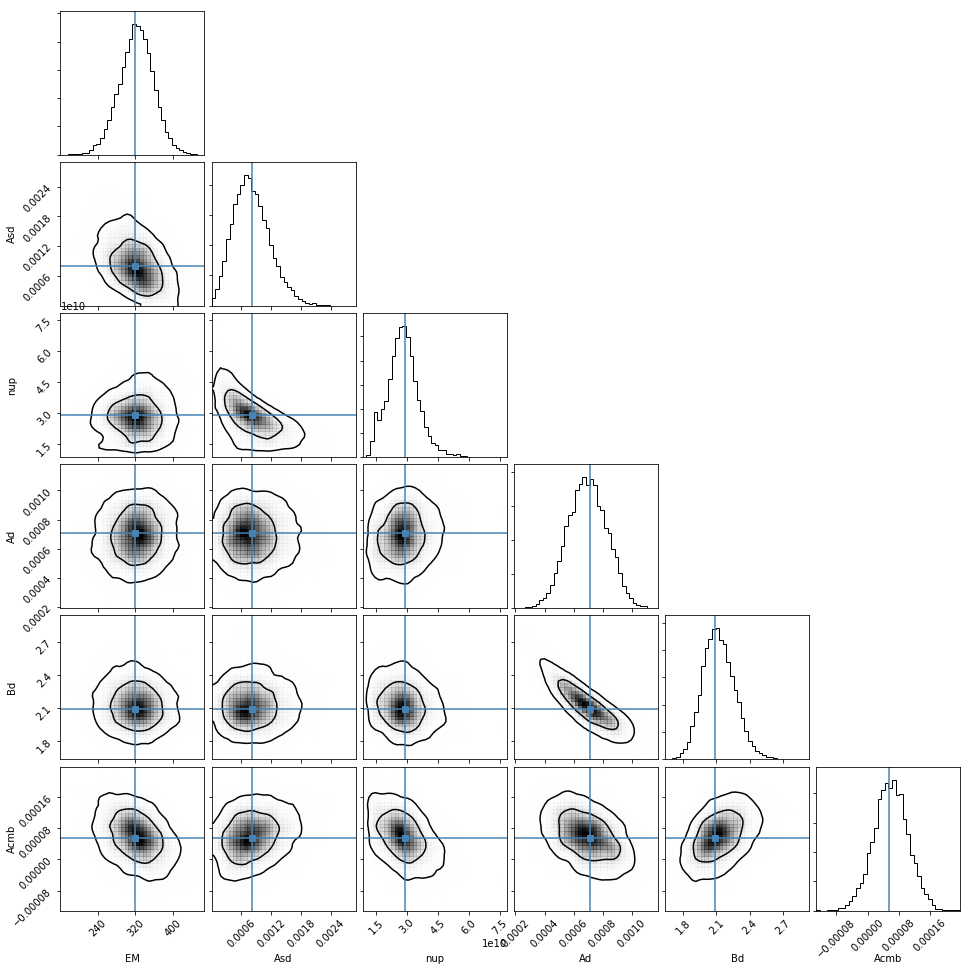

In [61]:
fig = corner.corner(samples2, plot_datapoints=False, bins=40, levels=[0.68,0.95], smooth=1.,\
                    labels=["EM", "Asd", "nup", "Ad", "Bd", "Acmb"], truths=samples2[42338])

In [42]:
prob1 = 0
for k in range(len(samples1)):
    prob1 += np.exp(lnlike2(samples1[k], bigfs, bigdata, bigerrs))

In [45]:
prob2 = 0
for k in range(len(samples2)):
    prob2 += np.exp(lnlike(samples2[k], bigfs, bigdata, bigerrs))

In [46]:
prob1

0.00085024034696440322

In [47]:
prob2

6.2092646584479706e-06

In [62]:
bic1 = np.log(len(bigdata)) * 6. - 2. * sampler2.lnprobability[:, 200:].reshape((-1, len(samples2))).max()

In [63]:
bic1

60.473801980406364

In [64]:
bic2 = np.log(len(bigdata)) * 4. - 2. * sampler1.lnprobability[:, 200:].reshape((-1, len(samples1))).max()

In [65]:
bic2

45.860747179063438